In [30]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.9 MB/s eta 0:00:00


In [31]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import optuna

In [32]:
def prepare_sentiment_data(company_name, filename):
  from google.colab import drive

  drive.mount('/content/gdrive')

  news_data = pd.read_excel(r"/content/gdrive/My Drive/Dataset/"+filename,sheet_name=company_name)
  news_data['date']=pd.to_datetime(news_data['date']).dt.date

  news_data.dropna(inplace=True)
  news_data['sentiment'] = news_data['sentiment'].apply(ast.literal_eval)
  news_data['polarity score'] = news_data['sentiment'].apply(lambda x: x.get('polarity'))

  polarity = news_data.groupby('date')['polarity score'].mean()
  polarity = pd.DataFrame(polarity)
  polarity = polarity.rename(columns={'polarity score':company_name+'_polarity'})

  return polarity

In [33]:
toyota_polarity = prepare_sentiment_data('Toyota', "News_Info.xlsx")
toyota_polarity

Mounted at /content/gdrive


,Toyota_polarity
date,
2015-09-17,0.997000
2015-09-21,0.996000
2015-10-16,0.998000
2016-02-03,0.994000
2016-03-09,1.000000
...,...
2024-05-02,0.999000
2024-05-03,0.724500
2024-05-06,0.927500


In [34]:
apple_polarity = prepare_sentiment_data('Apple', "News_Info.xlsx")
apple_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Apple_polarity
date,
2016-02-19,0.994000
2017-10-05,0.997000
2017-11-27,0.997000
2017-11-30,0.989000
2018-01-31,0.995000
...,...
2024-05-04,0.903100
2024-05-05,0.764286
2024-05-06,0.718313


In [35]:
amazon_polarity = prepare_sentiment_data('Amazon', "News_Info.xlsx")
amazon_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Amazon_polarity
date,
2015-10-22,0.989000
2016-01-11,0.983000
2016-05-05,0.997000
2016-06-16,0.999000
2016-08-11,0.926000
...,...
2024-05-04,0.829667
2024-05-05,0.660286
2024-05-06,0.502969


In [36]:
nissan_polarity = prepare_sentiment_data('Nissan',"News_Info.xlsx")
nissan_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Nissan_polarity
date,
2015-05-20,0.2730
2016-12-09,0.2140
2017-05-05,-0.6490
2017-08-17,0.0000
2017-09-06,0.6250
...,...
2024-04-25,0.3960
2024-04-26,0.9550
2024-04-30,0.1885


In [37]:
honda_polarity = prepare_sentiment_data('Honda',"News_Info.xlsx")
honda_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Honda_polarity
date,
2018-03-12,0.995000
2018-03-16,0.991000
2018-04-11,0.996000
2018-09-26,0.997000
2018-11-02,0.998000
...,...
2024-04-26,0.893667
2024-04-28,0.864000
2024-04-29,0.999000


In [38]:
mazda_polarity = prepare_sentiment_data('Mazda',"News_Info.xlsx")
mazda_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Mazda_polarity
date,
2016-04-14,0.3400
2017-08-03,0.4400
2020-06-16,0.9915
2020-06-30,0.9930
2020-07-03,0.9950
...,...
2024-02-21,0.9490
2024-02-28,0.9990
2024-03-07,0.9990


In [39]:
ford_polarity = prepare_sentiment_data('Ford',"News_Info_part2.xlsx")
ford_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Ford_polarity
date,
2017-10-05,0.997000
2017-10-30,0.034000
2017-11-02,0.758000
2017-11-17,0.396000
2017-11-21,0.170000
...,...
2024-05-04,0.996500
2024-05-05,0.905000
2024-05-06,0.817571


In [40]:
GM_polarity = prepare_sentiment_data('GM',"News_Info_part2.xlsx")
GM_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,GM_polarity
date,
2016-03-11,0.998000
2017-04-10,0.992000
2017-06-02,-0.900000
2017-06-13,-0.477000
2017-06-14,-0.902000
...,...
2024-05-04,0.997000
2024-05-05,0.905000
2024-05-06,0.905500


In [41]:
vw_polarity = prepare_sentiment_data('Volkswagen',"News_Info_part2.xlsx")
vw_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Volkswagen_polarity
date,
2020-04-17,-0.9380
2020-04-27,0.7600
2020-05-01,0.9860
2020-05-26,0.7770
2020-06-03,-0.9930
...,...
2024-04-30,0.2788
2024-05-01,0.9950
2024-05-03,0.9850


In [42]:
bmw_polarity = prepare_sentiment_data('BMW',"News_Info_part2.xlsx")
bmw_polarity

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,BMW_polarity
date,
2017-01-10,0.4120
2017-06-29,0.6250
2018-01-09,0.0000
2019-07-18,0.8630
2019-11-12,0.1280
...,...
2024-04-24,0.9960
2024-04-30,0.9950
2024-05-01,0.9970


In [43]:
polarity_data = pd.merge(toyota_polarity,nissan_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,honda_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,mazda_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,ford_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,GM_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,vw_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,bmw_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,apple_polarity,on='date',how='left')
polarity_data = pd.merge(polarity_data,amazon_polarity,on='date',how='left')
polarity_data.fillna(0,inplace=True)
polarity_data

,Toyota_polarity,Nissan_polarity,Honda_polarity,Mazda_polarity,Ford_polarity,GM_polarity,Volkswagen_polarity,BMW_polarity,Apple_polarity,Amazon_polarity
date,,,,,,,,,,
2015-09-17,0.997000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2015-09-21,0.996000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2015-10-16,0.998000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2016-02-03,0.994000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2016-03-09,1.000000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2024-05-02,0.999000,0.000,0.000,0.0,0.977250,0.881500,0.000,0.0000,0.687296,0.678538
2024-05-03,0.724500,0.990,0.990,0.0,0.542000,0.997000,0.985,0.9915,0.520036,0.807056
2024-05-06,0.927500,0.000,0.000,0.0,0.817571,0.905500,0.000,0.0000,0.718313,0.502969


## First Transformer Model (Encoder Only)

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [46]:
# Multi-Head Attention Component
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, n_heads):
        super(MultiHeadAttention, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=d_model, num_heads=n_heads)

    def forward(self, x):
        # x is expected to be (seq_len, batch_size, d_model)
        attn_output, attn_weights = self.attention(x, x, x)
        return attn_output, attn_weights

# Transformer Encoder Layer Component
class TransformerEncoderLayer(nn.Module):
    def __init__(self, d_model, n_heads, dropout=0.1):
        super(TransformerEncoderLayer, self).__init__()
        self.mha = MultiHeadAttention(d_model, n_heads)
        self.fc1 = nn.Linear(d_model, d_model * 4)
        self.fc2 = nn.Linear(d_model * 4, d_model)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)

    def forward(self, x):
        attn_output, attn_weights = self.mha(x)  # Get attention weights
        x = self.norm1(x + self.dropout1(attn_output))
        fc_output = F.relu(self.fc1(x))
        x = self.norm2(x + self.dropout2(self.fc2(fc_output)))
        return x, attn_weights  # Return attention weights as well

# Complete Transformer Model
class Trans(nn.Module):
    def __init__(self, input_size, trans_hidden_size, trans_kernel_size, seq_len, trans_n_heads, trans_n_layers):
        super(Trans, self).__init__()
        self.input_size = input_size
        self.trans_hidden_size = trans_hidden_size
        self.trans_kernel_size = trans_kernel_size
        self.seq_len = seq_len
        self.n_trans_head = trans_n_heads
        self.trans_n_layers = trans_n_layers

        self.conv = nn.Conv1d(input_size, trans_hidden_size, kernel_size=trans_kernel_size)
        #self.pos_encoder = PositionalEncoding(trans_hidden_size, max_len=seq_len)
        self.transformer_layers = nn.ModuleList(
            [TransformerEncoderLayer(trans_hidden_size, trans_n_heads) for _ in range(trans_n_layers)]
        )
        self.fc = nn.Linear(trans_hidden_size, input_size)


    def forward(self, x):
        x = x.transpose(1, 2)  # (batch_size, input_size, seq_len) -> (batch_size, seq_len, input_size)
        x = F.pad(x, (self.trans_kernel_size - 1, 0))  # Pad for convolution
        x = self.conv(x).permute(2, 0, 1)  # (batch_size, trans_hidden_size, new_seq_len) -> (new_seq_len, batch_size, trans_hidden_size)
        #x = self.pos_encoder(x)

        attn_weights_list = []  # List to store attention weights from each layer
        for layer in self.transformer_layers:
            x, attn_weights = layer(x)
            attn_weights_list.append(attn_weights)  # Collect attention weights

        output = self.fc(x)
        return output, attn_weights_list  # Return output and attention weights

In [47]:
model = Trans(input_size=len(polarity_data), trans_hidden_size=64, trans_kernel_size=3, seq_len=len(polarity_data), trans_n_heads=4, trans_n_layers=2)

input_tensor = torch.tensor(polarity_data.values,dtype=torch.float32).reshape(1,polarity_data.shape[1],polarity_data.shape[0])

In [48]:
output, attention_weights = model(input_tensor)

# attention_weights will be a list containing attention weights from each transformer layer
for i, attn in enumerate(attention_weights):
    print(f"Attention weights from layer {i+1}: {attn}")

Attention weights from layer 1: tensor([[[0.0987, 0.1024, 0.1015, 0.1002, 0.0992, 0.0998, 0.0979, 0.0980,
          0.1013, 0.1009],
         [0.0988, 0.1017, 0.1000, 0.1007, 0.1015, 0.0987, 0.1014, 0.0974,
          0.1018, 0.0979],
         [0.0997, 0.1035, 0.1013, 0.0980, 0.1015, 0.0996, 0.1005, 0.0966,
          0.1000, 0.0995],
         [0.1002, 0.1020, 0.1002, 0.0967, 0.1013, 0.1020, 0.1011, 0.0967,
          0.0990, 0.1009],
         [0.1010, 0.1040, 0.0997, 0.0983, 0.1017, 0.0967, 0.1008, 0.0968,
          0.1016, 0.0994],
         [0.0996, 0.1038, 0.1011, 0.0971, 0.1017, 0.1005, 0.1006, 0.0957,
          0.0985, 0.1014],
         [0.1014, 0.1038, 0.1023, 0.0959, 0.1017, 0.1002, 0.1012, 0.0956,
          0.0965, 0.1013],
         [0.0999, 0.1017, 0.1015, 0.0997, 0.1019, 0.0998, 0.0978, 0.0965,
          0.1007, 0.1005],
         [0.1014, 0.1017, 0.1014, 0.0958, 0.1027, 0.0997, 0.0981, 0.1008,
          0.0969, 0.1015],
         [0.0997, 0.1011, 0.1013, 0.0977, 0.1006, 0.1001, 0

In [49]:
attn.shape

torch.Size([1, 10, 10])

In [53]:
attn.squeeze(0).detach().numpy().shape

(10, 10)

In [50]:
polarity_data.shape

(996, 10)

In [56]:
attn2 = pd.DataFrame(attn.squeeze(0).detach().numpy(), columns=polarity_data.columns.to_list())
attn2

,Toyota_polarity,Nissan_polarity,Honda_polarity,Mazda_polarity,Ford_polarity,GM_polarity,Volkswagen_polarity,BMW_polarity,Apple_polarity,Amazon_polarity
0,0.098983,0.088736,0.097048,0.104940,0.104097,0.103725,0.104560,0.079827,0.133211,0.084871
1,0.073685,0.058718,0.085393,0.134015,0.120066,0.102520,0.106536,0.080731,0.113824,0.124513
2,0.068262,0.097370,0.126212,0.093855,0.101469,0.089056,0.090558,0.089161,0.108620,0.135438
3,0.144628,0.107036,0.074536,0.119372,0.100330,0.067478,0.097101,0.129579,0.084743,0.075197
4,0.115407,0.083731,0.094755,0.090958,0.097178,0.095163,0.103988,0.099567,0.083820,0.135433
5,0.107763,0.126546,0.098611,0.085726,0.086379,0.080617,0.092600,0.095232,0.107143,0.119384
6,0.107354,0.078721,0.092376,0.127580,0.083747,0.101018,0.087057,0.103594,0.119011,0.099543
7,0.073678,0.108236,0.092536,0.082625,0.088585,0.122062,0.134679,0.091875,0.077733,0.127993
8,0.138757,0.090784,0.068681,0.127435,0.083723,0.076268,0.081421,0.123832,0.125964,0.083134
9,0.109835,0.107069,0.106511,0.086602,0.098438,0.104415,0.093908,0.085225,0.098358,0.109640


In [61]:
new_columns = [col.replace("_polarity", "") for col in polarity_data.columns]
attn2.columns = new_columns
attn2

,Toyota,Nissan,Honda,Mazda,Ford,GM,Volkswagen,BMW,Apple,Amazon
0,0.098983,0.088736,0.097048,0.104940,0.104097,0.103725,0.104560,0.079827,0.133211,0.084871
1,0.073685,0.058718,0.085393,0.134015,0.120066,0.102520,0.106536,0.080731,0.113824,0.124513
2,0.068262,0.097370,0.126212,0.093855,0.101469,0.089056,0.090558,0.089161,0.108620,0.135438
3,0.144628,0.107036,0.074536,0.119372,0.100330,0.067478,0.097101,0.129579,0.084743,0.075197
4,0.115407,0.083731,0.094755,0.090958,0.097178,0.095163,0.103988,0.099567,0.083820,0.135433
5,0.107763,0.126546,0.098611,0.085726,0.086379,0.080617,0.092600,0.095232,0.107143,0.119384
6,0.107354,0.078721,0.092376,0.127580,0.083747,0.101018,0.087057,0.103594,0.119011,0.099543
7,0.073678,0.108236,0.092536,0.082625,0.088585,0.122062,0.134679,0.091875,0.077733,0.127993
8,0.138757,0.090784,0.068681,0.127435,0.083723,0.076268,0.081421,0.123832,0.125964,0.083134
9,0.109835,0.107069,0.106511,0.086602,0.098438,0.104415,0.093908,0.085225,0.098358,0.109640


In [62]:
attn2.corr()

,Toyota,Nissan,Honda,Mazda,Ford,GM,Volkswagen,BMW,Apple,Amazon
Toyota,1.000000,0.222123,-0.643279,0.275131,-0.390455,-0.691262,-0.503328,0.807830,-0.006966,-0.718550
Nissan,0.222123,1.000000,0.195637,-0.685346,-0.515110,-0.246852,0.028006,0.192356,-0.369338,-0.052602
Honda,-0.643279,0.195637,1.000000,-0.619347,0.146626,0.334946,0.018991,-0.662482,-0.029863,0.619536
Mazda,0.275131,-0.685346,-0.619347,1.000000,0.214571,-0.309857,-0.386709,0.379282,0.502660,-0.525236
Ford,-0.390455,-0.515110,0.146626,0.214571,1.000000,0.134483,0.214807,-0.471645,0.043631,0.174113
GM,-0.691262,-0.246852,0.334946,-0.309857,0.134483,1.000000,0.687429,-0.729690,-0.107535,0.453991
Volkswagen,-0.503328,0.028006,0.018991,-0.386709,0.214807,0.687429,1.000000,-0.380475,-0.544212,0.375042
BMW,0.807830,0.192356,-0.662482,0.379282,-0.471645,-0.729690,-0.380475,1.000000,-0.174938,-0.566869
Apple,-0.006966,-0.369338,-0.029863,0.502660,0.043631,-0.107535,-0.544212,-0.174938,1.000000,-0.392895
Amazon,-0.718550,-0.052602,0.619536,-0.525236,0.174113,0.453991,0.375042,-0.566869,-0.392895,1.000000


In [64]:
new_columns = [col.replace("_polarity", "") for col in polarity_data.columns]
polarity_data.columns = new_columns
polarity_data

,Toyota,Nissan,Honda,Mazda,Ford,GM,Volkswagen,BMW,Apple,Amazon
date,,,,,,,,,,
2015-09-17,0.997000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2015-09-21,0.996000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2015-10-16,0.998000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2016-02-03,0.994000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2016-03-09,1.000000,0.000,0.000,0.0,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2024-05-02,0.999000,0.000,0.000,0.0,0.977250,0.881500,0.000,0.0000,0.687296,0.678538
2024-05-03,0.724500,0.990,0.990,0.0,0.542000,0.997000,0.985,0.9915,0.520036,0.807056
2024-05-06,0.927500,0.000,0.000,0.0,0.817571,0.905500,0.000,0.0000,0.718313,0.502969


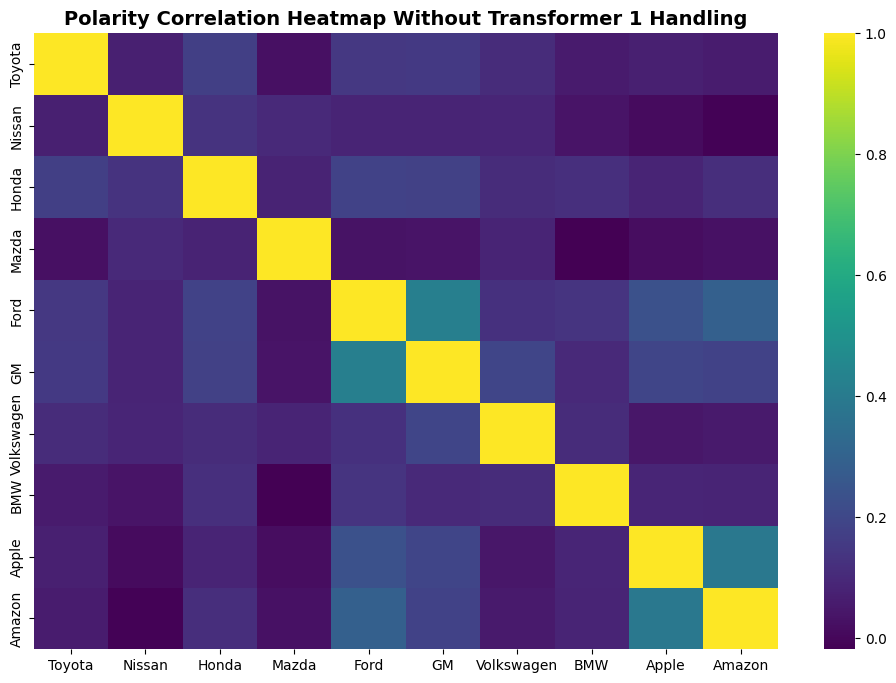

In [78]:
plt.figure(figsize=(12, 8))
sns.heatmap(polarity_data.corr(), cmap='viridis')
plt.title("Polarity Correlation Heatmap Without Transformer 1 Handling", fontweight='bold', fontsize=14)
plt.savefig("/content/gdrive/My Drive/Dataset/correlation_without_handling.png")
plt.show()

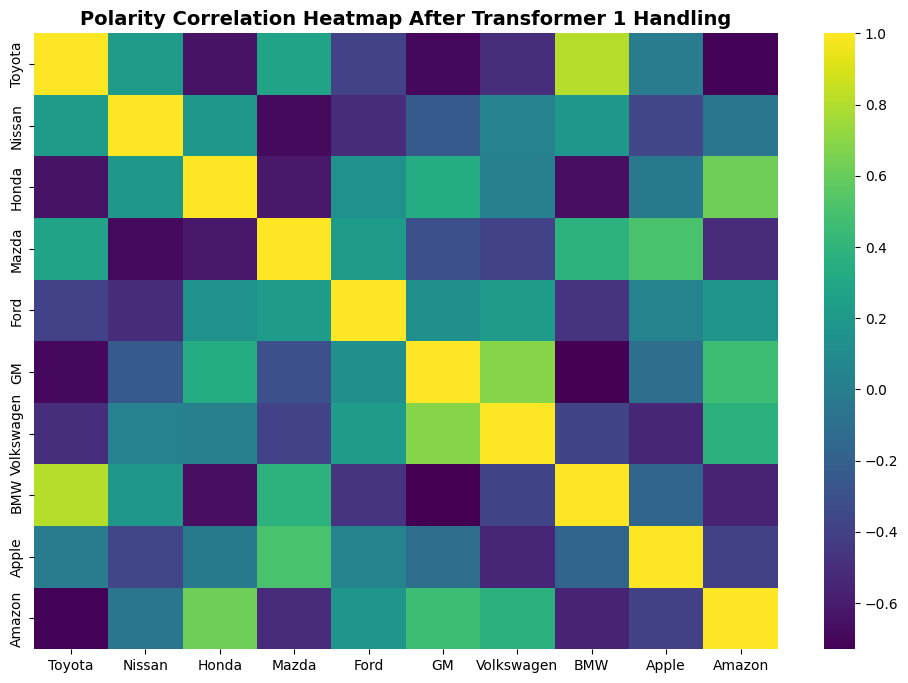

In [79]:
# Create heatmap
# Select the attention weights for the first head and the first example in the batch
#attn_head_0_example_0 = attn[0, :, :]  # Shape: (20, 20)
plt.figure(figsize=(12, 8))
sns.heatmap(attn2.corr(), cmap='viridis')
plt.title("Polarity Correlation Heatmap After Transformer 1 Handling", fontweight='bold', fontsize=14)
plt.savefig("/content/gdrive/My Drive/Dataset/correlation_with_handling.png")
plt.show()

In [85]:
new_polarity_data = pd.DataFrame(output.detach().numpy().squeeze().T,columns=polarity_data.columns, index=polarity_data.index)
new_polarity_data

,Toyota,Nissan,Honda,Mazda,Ford,GM,Volkswagen,BMW,Apple,Amazon
date,,,,,,,,,,
2015-09-17,-0.198518,-0.410035,-0.414068,-0.647673,-0.665365,-1.281094,-0.424793,-0.668844,-0.040132,-0.572116
2015-09-21,0.977130,-0.070291,0.496744,1.179006,0.327288,1.019044,0.672714,0.986997,0.770968,1.138811
2015-10-16,0.949245,0.735978,0.011237,1.404285,1.046063,-0.411154,0.295675,0.732456,1.192765,0.521069
2016-02-03,0.397398,-0.168403,0.333654,0.172370,-0.167213,0.280505,0.019107,0.296763,0.087153,0.598268
2016-03-09,-0.810302,-0.266901,-0.027941,-0.340098,-0.748402,-0.524315,-0.605785,-0.427996,-0.276208,-0.401701
...,...,...,...,...,...,...,...,...,...,...
2024-05-02,-0.113554,-0.413563,0.302425,0.245024,-0.069547,0.462592,-0.267803,-0.583993,-0.362599,0.251267
2024-05-03,1.162024,0.350309,0.287102,0.000630,0.205835,0.310679,-0.187916,-0.091503,0.765454,0.344238
2024-05-06,-0.098598,-0.872566,0.364576,-0.678320,0.202477,-0.334596,-0.694552,-1.213841,0.235818,0.380257


In [86]:
# import toyota stock price
import yfinance as yf

start_date = "2015-05-01"
end_date = "2024-05-08"

stock_data = yf.Ticker('7203.T')
stock_data = stock_data.history(start=start_date, end=end_date)
stock_data.index = pd.to_datetime(stock_data.index)
stock_data['date'] = stock_data.index
stock_data.reset_index(drop=True, inplace=True)

In [87]:
stock_data.set_index('date',inplace=True)

In [88]:
stock_data.index = stock_data.index.date
stock_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2015-05-01,1247.626725,1250.182739,1234.696429,1250.182739,37228500,0.0,0.0
2015-05-07,1240.560414,1242.815706,1233.493909,1234.997437,40812500,0.0,0.0
2015-05-08,1234.696734,1255.144670,1231.388955,1244.770386,44073500,0.0,0.0
2015-05-11,1262.962987,1262.962987,1235.147730,1238.154785,55217000,0.0,0.0
2015-05-12,1238.154774,1245.522095,1231.689625,1245.522095,35281500,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-26,3450.622738,3496.933209,3417.121546,3458.505371,30255300,0.0,0.0
2024-04-30,3524.522363,3586.598100,3503.830451,3584.627441,35459100,0.0,0.0
2024-05-01,3547.184927,3605.319346,3523.537027,3552.111572,27076000,0.0,0.0
2024-05-02,3528.463623,3568.862117,3506.786382,3528.463623,20164900,0.0,0.0


In [84]:
# run this code when using other models except Dual Transformer
#stock_data = pd.merge(stock_data, polarity_data,left_index=True,right_index=True,how='left').fillna(0)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Toyota,Nissan,Honda,Mazda,Ford,GM,Volkswagen,BMW,Apple,Amazon
2015-05-01,1247.626725,1250.182739,1234.696429,1250.182739,37228500,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000000,0.000000
2015-05-07,1240.560414,1242.815706,1233.493909,1234.997437,40812500,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000000,0.000000
2015-05-08,1234.696734,1255.144670,1231.388955,1244.770386,44073500,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000000,0.000000
2015-05-11,1262.962987,1262.962987,1235.147730,1238.154785,55217000,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000000,0.000000
2015-05-12,1238.154774,1245.522095,1231.689625,1245.522095,35281500,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,3450.622738,3496.933209,3417.121546,3458.505371,30255300,0.0,0.0,0.838250,0.9550,0.893667,0.0,0.703250,0.574545,0.9980,0.000,0.513125,0.630143
2024-04-30,3524.522363,3586.598100,3503.830451,3584.627441,35459100,0.0,0.0,0.904500,0.1885,0.000000,0.0,0.991333,0.993667,0.2788,0.995,0.616087,0.697914
2024-05-01,3547.184927,3605.319346,3523.537027,3552.111572,27076000,0.0,0.0,0.755000,0.0000,0.000000,0.0,0.574000,0.913333,0.9950,0.997,0.665312,0.740286
2024-05-02,3528.463623,3568.862117,3506.786382,3528.463623,20164900,0.0,0.0,0.999000,0.0000,0.000000,0.0,0.977250,0.881500,0.0000,0.000,0.687296,0.678538


In [89]:
stock_data = pd.merge(stock_data,new_polarity_data,left_index=True,right_index=True,how='left').fillna(0)
stock_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Toyota,Nissan,Honda,Mazda,Ford,GM,Volkswagen,BMW,Apple,Amazon
2015-05-01,1247.626725,1250.182739,1234.696429,1250.182739,37228500,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-05-07,1240.560414,1242.815706,1233.493909,1234.997437,40812500,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-05-08,1234.696734,1255.144670,1231.388955,1244.770386,44073500,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-05-11,1262.962987,1262.962987,1235.147730,1238.154785,55217000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-05-12,1238.154774,1245.522095,1231.689625,1245.522095,35281500,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,3450.622738,3496.933209,3417.121546,3458.505371,30255300,0.0,0.0,0.223737,0.111753,0.237974,-0.141745,-0.238125,-0.150107,-0.246009,-0.520884,0.277310,0.598096
2024-04-30,3524.522363,3586.598100,3503.830451,3584.627441,35459100,0.0,0.0,-0.363391,-0.530373,-0.778769,-0.024062,-0.238680,-0.420132,-0.134950,-1.022419,-0.619330,0.011440
2024-05-01,3547.184927,3605.319346,3523.537027,3552.111572,27076000,0.0,0.0,0.035835,0.135607,0.208484,-0.357637,0.007232,0.623319,0.760475,0.712843,-0.445029,-0.083400
2024-05-02,3528.463623,3568.862117,3506.786382,3528.463623,20164900,0.0,0.0,-0.113554,-0.413563,0.302425,0.245024,-0.069547,0.462592,-0.267803,-0.583993,-0.362599,0.251267


### Stock Price Prediction

In [90]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import numpy as np
import pandas as pd
import torch.optim as optim
import torch.utils.data as data
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
from torch.nn.utils.parametrizations import weight_norm
import math

In [91]:
# split data into training and testing

def Split_data(X, y, window, predict_forward):
    #X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    training_data_len = int(np.ceil( len(y) * .7 ))

    train_data = X[0:int(training_data_len)]
    train_target = y[0:int(training_data_len)]

    #Feature Scaling
    scaler_train = MinMaxScaler(feature_range=(0,1))
    train_data = scaler_train.fit_transform(train_data)
    scaler_train_target = MinMaxScaler(feature_range=(0,1))
    train_target = scaler_train_target.fit_transform(train_target.reshape(-1, 1))

    # Split the data into x_train and y_train data sets
    X_train = []
    y_train = []

    for i in range(len(train_data) - window - predict_forward + 1):
        X_train.append(train_data[i:(i+window)])
        y_train.append(train_target[(i+window):(i+window+predict_forward)])

    X_train = np.array(X_train)
    y_train = np.array(y_train)


    #X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],X_train.shape[2]))
    y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1]))

    X_test = []
    y_test = []

    test_data = X[training_data_len-window:]
    test_target = y[training_data_len-window:]

    #Feature Scaling
    scaler_test = MinMaxScaler(feature_range=(0,1))
    test_data = scaler_test.fit_transform(test_data)
    scaler_test_target = MinMaxScaler(feature_range=(0,1))
    test_target = scaler_test_target.fit_transform(test_target.reshape(-1, 1))

    for i in range(len(test_data) - window - predict_forward + 1):
        X_test.append(test_data[i:(i+window)])
        y_test.append(test_target[(i+window):(i+window+predict_forward)])

    X_test = np.array(X_test)
    y_test = np.array(y_test)


    #X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],X_test.shape[2]))
    y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1]))


    return X_train, y_train, X_test, y_test, training_data_len, scaler_test_target

In [92]:
def prepare_data(data, feature_list, window_size,predict_forward):
  X = data[feature_list]
  y = data['Close'].values
  X_train, y_train, X_test, y_test, training_data_len, scaler_test_target  = Split_data(X, y, window_size,predict_forward)

  X_train = torch.tensor(X_train, dtype=torch.float32)
  X_test = torch.tensor(X_test, dtype=torch.float32)

  y_train = torch.tensor(y_train, dtype=torch.float32)
  y_test = torch.tensor(y_test, dtype=torch.float32)

  return X_train, y_train, X_test, y_test

In [93]:
window_size = 5
predict_forward = 1

In [94]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Toyota', 'Nissan', 'Honda', 'Mazda', 'Ford', 'GM', 'Volkswagen', 'BMW',
       'Apple', 'Amazon'],
      dtype='object')

In [95]:
X = ['Close', 'Toyota', 'Nissan', 'Honda', 'Mazda', 'Ford', 'GM', 'Volkswagen', 'BMW',
       'Apple', 'Amazon']

In [96]:
X_train, y_train, X_test, y_test = prepare_data(stock_data, X, window_size, predict_forward)

In [97]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([1551, 5, 11]),
 torch.Size([1551, 1]),
 torch.Size([666, 5, 11]),
 torch.Size([666, 1]))

In [98]:
stock_data['date'] = stock_data.index
stock_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Toyota,Nissan,Honda,Mazda,Ford,GM,Volkswagen,BMW,Apple,Amazon,date
2015-05-01,1247.626725,1250.182739,1234.696429,1250.182739,37228500,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-05-01
2015-05-07,1240.560414,1242.815706,1233.493909,1234.997437,40812500,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-05-07
2015-05-08,1234.696734,1255.144670,1231.388955,1244.770386,44073500,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-05-08
2015-05-11,1262.962987,1262.962987,1235.147730,1238.154785,55217000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-05-11
2015-05-12,1238.154774,1245.522095,1231.689625,1245.522095,35281500,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,3450.622738,3496.933209,3417.121546,3458.505371,30255300,0.0,0.0,0.223737,0.111753,0.237974,-0.141745,-0.238125,-0.150107,-0.246009,-0.520884,0.277310,0.598096,2024-04-26
2024-04-30,3524.522363,3586.598100,3503.830451,3584.627441,35459100,0.0,0.0,-0.363391,-0.530373,-0.778769,-0.024062,-0.238680,-0.420132,-0.134950,-1.022419,-0.619330,0.011440,2024-04-30
2024-05-01,3547.184927,3605.319346,3523.537027,3552.111572,27076000,0.0,0.0,0.035835,0.135607,0.208484,-0.357637,0.007232,0.623319,0.760475,0.712843,-0.445029,-0.083400,2024-05-01
2024-05-02,3528.463623,3568.862117,3506.786382,3528.463623,20164900,0.0,0.0,-0.113554,-0.413563,0.302425,0.245024,-0.069547,0.462592,-0.267803,-0.583993,-0.362599,0.251267,2024-05-02


# Transformer

In [99]:
"Transformer 2 (Encoder + Decoder)"

def compared_version(ver1, ver2):
    """
    :param ver1
    :param ver2
    :return: ver1< = >ver2 False/True
    """
    list1 = str(ver1).split(".")
    list2 = str(ver2).split(".")

    for i in range(len(list1)) if len(list1) < len(list2) else range(len(list2)):
        if int(list1[i]) == int(list2[i]):
            pass
        elif int(list1[i]) < int(list2[i]):
            return -1
        else:
            return 1

    if len(list1) == len(list2):
        return True
    elif len(list1) < len(list2):
        return False
    else:
        return True


class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEmbedding, self).__init__()
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model).float()
        pe.require_grad = False

        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe[:, :x.size(1)]


class TokenEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(TokenEmbedding, self).__init__()
        padding = 1 if compared_version(torch.__version__, '1.5.0') else 2
        self.tokenConv = nn.Conv1d(in_channels=c_in, out_channels=d_model,
                                   kernel_size=3, padding=padding, padding_mode='circular', bias=False)
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='leaky_relu')

    def forward(self, x):
        x = self.tokenConv(x.permute(0, 2, 1)).transpose(1, 2)
        return x


class FixedEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(FixedEmbedding, self).__init__()

        w = torch.zeros(c_in, d_model).float()
        w.require_grad = False

        position = torch.arange(0, c_in).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

        w[:, 0::2] = torch.sin(position * div_term)
        w[:, 1::2] = torch.cos(position * div_term)

        self.emb = nn.Embedding(c_in, d_model)
        self.emb.weight = nn.Parameter(w, requires_grad=False)

    def forward(self, x):
        return self.emb(x).detach()


class TemporalEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='fixed', freq='h'):
        super(TemporalEmbedding, self).__init__()

        weekday_size = 365
        day_size = 365
        month_size = 365

        Embed = FixedEmbedding if embed_type == 'fixed' else nn.Embedding

        self.weekday_embed = Embed(weekday_size, d_model)
        self.day_embed = Embed(day_size, d_model)
        self.month_embed = Embed(month_size, d_model)

    def forward(self, x):
        x = x.long()

        weekday_x = self.weekday_embed(x[:, :, 2])
        day_x = self.day_embed(x[:, :, 1])
        month_x = self.month_embed(x[:, :, 0])

        return weekday_x + day_x + month_x


class TimeFeatureEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='timeF', freq='h'):
        super(TimeFeatureEmbedding, self).__init__()

        freq_map = {'h': 4, 't': 5, 's': 6, 'm': 1, 'a': 1, 'w': 2, 'd': 3, 'b': 3}
        d_inp = freq_map[freq]
        self.embed = nn.Linear(d_inp, d_model, bias=False)

    def forward(self, x):
        return self.embed(x)


class DataEmbedding(nn.Module):
    def __init__(self, c_in, d_model, embed_type='fixed', freq='h', dropout=0.1):
        super(DataEmbedding, self).__init__()

        self.value_embedding = TokenEmbedding(c_in=c_in, d_model=d_model)
        self.position_embedding = PositionalEmbedding(d_model=d_model)
        self.temporal_embedding = TemporalEmbedding(d_model=d_model, embed_type=embed_type,
                                                    freq=freq) if embed_type != 'timeF' else TimeFeatureEmbedding(
            d_model=d_model, embed_type=embed_type, freq=freq)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, x_mark):
        x = self.value_embedding(x) + self.temporal_embedding(x_mark) + self.position_embedding(x)
        return self.dropout(x)

In [100]:
from math import sqrt


class TriangularCausalMask():
    def __init__(self, B, L, device="cpu"):
        mask_shape = [B, 1, L, L]
        with torch.no_grad():
            self._mask = torch.triu(torch.ones(mask_shape, dtype=torch.bool), diagonal=1).to(device)

    @property
    def mask(self):
        return self._mask


class ProbMask():
    def __init__(self, B, H, L, index, scores, device="cpu"):
        _mask = torch.ones(L, scores.shape[-1], dtype=torch.bool).to(device).triu(1)
        _mask_ex = _mask[None, None, :].expand(B, H, L, scores.shape[-1])
        indicator = _mask_ex[torch.arange(B)[:, None, None],
                    torch.arange(H)[None, :, None],
                    index, :].to(device)
        self._mask = indicator.view(scores.shape).to(device)

    @property
    def mask(self):
        return self._mask


class FullAttention(nn.Module):
    def __init__(self, mask_flag=True, factor=5, scale=None, attention_dropout=0.1, output_attention=False):
        super(FullAttention, self).__init__()
        self.scale = scale
        self.mask_flag = mask_flag
        self.output_attention = output_attention
        self.dropout = nn.Dropout(attention_dropout)

    def forward(self, queries, keys, values, attn_mask):
        B, L, H, E = queries.shape
        _, S, _, D = values.shape
        scale = self.scale or 1. / sqrt(E)

        scores = torch.einsum("blhe,bshe->bhls", queries, keys)

        if self.mask_flag:
            if attn_mask is None:
                attn_mask = TriangularCausalMask(B, L, device=queries.device)

            scores.masked_fill_(attn_mask.mask, -np.inf)

        A = self.dropout(torch.softmax(scale * scores, dim=-1))
        V = torch.einsum("bhls,bshd->blhd", A, values)

        if self.output_attention:
            return (V.contiguous(), A)
        else:
            return (V.contiguous(), None)

class AttentionLayer(nn.Module):
    def __init__(self, attention, d_model, n_heads, d_keys=None,
                 d_values=None):
        super(AttentionLayer, self).__init__()

        d_keys = d_keys or (d_model // n_heads)
        d_values = d_values or (d_model // n_heads)

        self.inner_attention = attention
        self.query_projection = nn.Linear(d_model, d_keys * n_heads)
        self.key_projection = nn.Linear(d_model, d_keys * n_heads)
        self.value_projection = nn.Linear(d_model, d_values * n_heads)
        self.out_projection = nn.Linear(d_values * n_heads, d_model)
        self.n_heads = n_heads

    def forward(self, queries, keys, values, attn_mask):
        B, L, _ = queries.shape
        _, S, _ = keys.shape
        H = self.n_heads

        queries = self.query_projection(queries).view(B, L, H, -1)
        keys = self.key_projection(keys).view(B, S, H, -1)
        values = self.value_projection(values).view(B, S, H, -1)

        out, attn = self.inner_attention(
            queries,
            keys,
            values,
            attn_mask
        )
        out = out.view(B, L, -1)

        return self.out_projection(out), attn


In [101]:
class ConvLayer(nn.Module):
    def __init__(self, c_in):
        super(ConvLayer, self).__init__()
        self.downConv = nn.Conv1d(in_channels=c_in,
                                  out_channels=c_in,
                                  kernel_size=3,
                                  padding=2,
                                  padding_mode='circular')
        self.norm = nn.BatchNorm1d(c_in)
        self.activation = nn.ELU()
        self.maxPool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        x = self.downConv(x.permute(0, 2, 1))
        x = self.norm(x)
        x = self.activation(x)
        x = self.maxPool(x)
        x = x.transpose(1, 2)
        return x


class EncoderLayer(nn.Module):
    def __init__(self, attention, d_model, d_ff=None, dropout=0.1, activation="relu"):
        super(EncoderLayer, self).__init__()
        d_ff = d_ff or 4 * d_model
        self.attention = attention
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        self.activation = F.relu if activation == "relu" else F.gelu

    def forward(self, x, attn_mask=None):
        new_x, attn = self.attention(
            x, x, x,
            attn_mask=attn_mask
        )
        x = x + self.dropout(new_x)

        y = x = self.norm1(x)
        y = self.dropout(self.activation(self.conv1(y.transpose(-1, 1))))
        y = self.dropout(self.conv2(y).transpose(-1, 1))

        return self.norm2(x + y), attn


class Encoder(nn.Module):
    def __init__(self, attn_layers, conv_layers=None, norm_layer=None):
        super(Encoder, self).__init__()
        self.attn_layers = nn.ModuleList(attn_layers)
        self.conv_layers = nn.ModuleList(conv_layers) if conv_layers is not None else None
        self.norm = norm_layer

    def forward(self, x, attn_mask=None):
        # x [B, L, D]
        attns = []
        if self.conv_layers is not None:
            for attn_layer, conv_layer in zip(self.attn_layers, self.conv_layers):
                x, attn = attn_layer(x, attn_mask=attn_mask)
                x = conv_layer(x)
                attns.append(attn)
            x, attn = self.attn_layers[-1](x)
            attns.append(attn)
        else:
            for attn_layer in self.attn_layers:
                x, attn = attn_layer(x, attn_mask=attn_mask)
                attns.append(attn)

        if self.norm is not None:
            x = self.norm(x)

        return x, attns


class DecoderLayer(nn.Module):
    def __init__(self, self_attention, cross_attention, d_model, d_ff=None,
                 dropout=0.1, activation="relu"):
        super(DecoderLayer, self).__init__()
        d_ff = d_ff or 4 * d_model
        self.self_attention = self_attention
        self.cross_attention = cross_attention
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        self.activation = F.relu if activation == "relu" else F.gelu

    def forward(self, x, cross, x_mask=None, cross_mask=None):
        x = x + self.dropout(self.self_attention(
            x, x, x,
            attn_mask=x_mask
        )[0])
        x = self.norm1(x)

        x = x + self.dropout(self.cross_attention(
            x, cross, cross,
            attn_mask=cross_mask
        )[0])

        y = x = self.norm2(x)
        y = self.dropout(self.activation(self.conv1(y.transpose(-1, 1))))
        y = self.dropout(self.conv2(y).transpose(-1, 1))

        return self.norm3(x + y)


class Decoder(nn.Module):
    def __init__(self, layers, norm_layer=None, projection=None):
        super(Decoder, self).__init__()
        self.layers = nn.ModuleList(layers)
        self.norm = norm_layer
        self.projection = projection

    def forward(self, x, cross, x_mask=None, cross_mask=None):
        for layer in self.layers:
            x = layer(x, cross, x_mask=x_mask, cross_mask=cross_mask)

        if self.norm is not None:
            x = self.norm(x)

        if self.projection is not None:
            x = self.projection(x)
        return x

In [102]:
class Model(nn.Module):
    """
    Vanilla Transformer with O(L^2) complexity
    """
    def __init__(self, pred_len=predict_forward, output_attention=False, enc_in=X_train.shape[-1], dec_in=1, c_out=1, d_model=512, embed='fixed',
                 freq='h', dropout=0.0, factor=5, n_heads=8, d_ff=512, activation='gelu', e_layers=3, d_layers=2):
        super(Model, self).__init__()
        self.pred_len = pred_len
        self.output_attention = output_attention

        # Embedding
        self.enc_embedding = DataEmbedding(enc_in, d_model, embed, freq,
                                           dropout)
        self.dec_embedding = DataEmbedding(dec_in, d_model, embed, freq,
                                           dropout)
        # Encoder
        self.encoder = Encoder(
            [
                EncoderLayer(
                    AttentionLayer(
                        FullAttention(False, factor, attention_dropout=dropout,
                                      output_attention=output_attention), d_model, n_heads),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation
                ) for l in range(e_layers)
            ],
            norm_layer=torch.nn.LayerNorm(d_model)
        )
        # Decoder
        self.decoder = Decoder(
            [
                DecoderLayer(
                    AttentionLayer(
                        FullAttention(True, factor, attention_dropout=dropout, output_attention=False),
                        d_model, n_heads),
                    AttentionLayer(
                        FullAttention(False, factor, attention_dropout=dropout, output_attention=False),
                        d_model, n_heads),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation,
                )
                for l in range(d_layers)
            ],
            norm_layer=torch.nn.LayerNorm(d_model),
            projection=nn.Linear(d_model, c_out, bias=True)
        )

    def forward(self, x_enc, x_mark_enc, x_dec, x_mark_dec,
                enc_self_mask=None, dec_self_mask=None, dec_enc_mask=None):

        enc_out = self.enc_embedding(x_enc, x_mark_enc)
        enc_out, attns = self.encoder(enc_out, attn_mask=enc_self_mask)

        dec_out = self.dec_embedding(x_dec, x_mark_dec)
        dec_out = self.decoder(dec_out, enc_out, x_mask=dec_self_mask, cross_mask=dec_enc_mask)

        if self.output_attention:
            return dec_out[:, -self.pred_len:, :], attns
        else:
            return dec_out[:, -self.pred_len:, :]  # [B, L, D]

In [103]:
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from tqdm import tqdm

train_size = 0.7
s_len = X_train.shape[-1]
pre_len = predict_forward
batch_size = 64
lr = 5e-5
epochs = 20

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()


def create_data(datas, s_len):

    values = []
    labels = []

    lens = datas.shape[0]
    datas = datas.values
    for index in range(0, lens-pre_len-s_len):
        value = datas[index:index+s_len, [stock_data.columns.get_loc('date')]+[stock_data.columns.get_loc(col) for col in X]]
        label = datas[index+s_len-pre_len:index+s_len+pre_len, [stock_data.columns.get_loc('date'), stock_data.columns.get_loc('Close')]]

        values.append(value)
        labels.append(label)

    return values, labels



def read_data(data, s_len):

    xs = data.values[:, [stock_data.columns.get_loc(col) for col in X]]
    ys = data.values[:, stock_data.columns.get_loc('Close')]

    x_scaler.fit_transform(xs)
    y_scaler.fit_transform(ys[:, None])

    values, labels = create_data(data, s_len)

    train_x, test_x, train_y, test_y = train_test_split(values, labels, train_size=train_size)

    return train_x, test_x, train_y, test_y


class AmaData(Dataset):
    def __init__(self, values, labels):

        self.values, self.labels = values, labels

    def __len__(self):
        return len(self.values)

    def create_time(self, data):

        time = data[:, 0]
        time = pd.to_datetime(time)

        week = np.int32(time.dayofweek)[:, None]
        month = np.int32(time.month)[:, None]
        day = np.int32(time.day)[:, None]
        time_data = np.concatenate([month, week, day], axis=-1)

        return time_data

    def __getitem__(self, item):

        value = self.values[item]
        label = self.labels[item]

        value_t = self.create_time(value)
        label_t = self.create_time(label)

        value = x_scaler.transform(value[:, 1:])
        label = y_scaler.transform(label[:, 1][:, None])
        value = np.float32(value)
        label = np.float32(label)
        return value, label, value_t, label_t


def TransformerTrain(data, s_len):

    train_x, test_x, train_y, test_y = read_data(data, s_len)

    train_data = AmaData(train_x, train_y)
    train_data = DataLoader(train_data, shuffle=True, batch_size=batch_size)

    test_data = AmaData(test_x, test_y)
    test_data = DataLoader(test_data, shuffle=True, batch_size=batch_size)

    model = Model()
    model.train()

    MSE = nn.MSELoss()
    MAE = nn.L1Loss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        pbar = tqdm(train_data)
        for step, (x, y ,xt, yt) in enumerate(pbar):
            mask = torch.zeros_like(y)[:, pre_len:]

            dec_y = torch.cat([y[:, :pre_len], mask], dim=1)

            #dec_y = torch.cat([y[:, pre_len-1:pre_len], mask], dim=1)   #target sequence shifted right

            logits = model(x, xt, dec_y, yt)

            loss_mse = MSE(logits, y[:, pre_len:])
            loss_mae = MAE(logits, y[:, pre_len:])

            optimizer.zero_grad()
            loss_mse.backward()
            optimizer.step()

            s = "train ==> epoch:{} - step:{} - MSE:{} - MAE:{}".format(epoch, step, loss_mse, loss_mae)

            pbar.set_description(s)

        model.eval()
        with torch.no_grad():

            pbar = tqdm(test_data)
            predictions = []
            actual = []
            for step, (x, y, xt, yt) in enumerate(pbar):
                mask = torch.zeros_like(y)[:, pre_len:]

                #dec_y = torch.cat([y[:, pre_len-1:pre_len], mask], dim=1)
                dec_y = torch.cat([y[:, :pre_len], mask], dim=1)

                logits = model(x, xt, dec_y, yt)

                predictions.append(y_scaler.inverse_transform(logits.numpy().squeeze().reshape(-1, 1)))
                actual.append(y_scaler.inverse_transform(y[:, pre_len:].numpy().squeeze().reshape(-1, 1)))

                loss_mse = MSE(logits, y[:, pre_len:])
                loss_mae = MAE(logits, y[:, pre_len:])

                s = "test ==> epoch:{} - step:{} - MSE:{} - MAE:{}".format(epoch, step, loss_mse, loss_mae)

                pbar.set_description(s)

        model.train()

    return loss_mse, loss_mae, logits, predictions, actual

In [104]:
tf_mse, tf_mae,logits, predictions, actual = TransformerTrain(stock_data, window_size)

train ==> epoch:0 - step:24 - MSE:0.11087576299905777 - MAE:0.31643858551979065: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
test ==> epoch:0 - step:10 - MSE:0.05625775456428528 - MAE:0.21939855813980103: 100%|██████████| 11/11 [00:02<00:00,  4.11it/s]
train ==> epoch:1 - step:24 - MSE:0.010671203956007957 - MAE:0.08870210498571396: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s]
test ==> epoch:1 - step:10 - MSE:0.009976913221180439 - MAE:0.0913170874118805: 100%|██████████| 11/11 [00:02<00:00,  4.05it/s]
train ==> epoch:2 - step:24 - MSE:0.0019009296083822846 - MAE:0.03546401485800743: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s]
test ==> epoch:2 - step:10 - MSE:0.0009038185235112906 - MAE:0.023789914324879646: 100%|██████████| 11/11 [00:03<00:00,  3.56it/s]
train ==> epoch:3 - step:24 - MSE:0.0006398872938007116 - MAE:0.022209882736206055: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s]
test ==> epoch:3 - step:10 - MSE:0.0008335054153576493 - MAE:0.023709682747721672: 100%|███

In [105]:
tf_mse, tf_mae

(tensor(0.0001), tensor(0.0082))

# Informer

In [ ]:
class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEmbedding, self).__init__()
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model).float()
        pe.require_grad = False

        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe[:, :x.size(1)]

class TokenEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(TokenEmbedding, self).__init__()
        padding = 1 if torch.__version__>='1.5.0' else 2
        self.tokenConv = nn.Conv1d(in_channels=c_in, out_channels=d_model,
                                    kernel_size=3, padding=padding, padding_mode='circular')
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight,mode='fan_in',nonlinearity='leaky_relu')

    def forward(self, x):
        x = self.tokenConv(x.permute(0, 2, 1)).transpose(1,2)
        return x

class FixedEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(FixedEmbedding, self).__init__()

        w = torch.zeros(c_in, d_model).float()
        w.require_grad = False

        position = torch.arange(0, c_in).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

        w[:, 0::2] = torch.sin(position * div_term)
        w[:, 1::2] = torch.cos(position * div_term)

        self.emb = nn.Embedding(c_in, d_model)
        self.emb.weight = nn.Parameter(w, requires_grad=False)

    def forward(self, x):
        return self.emb(x)

class TemporalEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='fixed', freq='h'):
        super(TemporalEmbedding, self).__init__()

        weekday_size = 356
        day_size = 356
        month_size = 356

        Embed = FixedEmbedding if embed_type=='fixed' else nn.Embedding

        self.weekday_embed = Embed(weekday_size, d_model)
        self.day_embed = Embed(day_size, d_model)
        self.month_embed = Embed(month_size, d_model)

    def forward(self, x):

        weekday_x = self.weekday_embed(x[:,:,1])
        day_x = self.day_embed(x[:, :, -1])
        month_x = self.month_embed(x[:, :, 0])

        return weekday_x + day_x + month_x

class TimeFeatureEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='timeF', freq='h'):
        super(TimeFeatureEmbedding, self).__init__()

        freq_map = {'h':4, 't':5, 's':6, 'm':1, 'a':1, 'w':2, 'd':3, 'b':3}
        d_inp = freq_map[freq]
        self.embed = nn.Linear(d_inp, d_model)

    def forward(self, x):
        return self.embed(x)

class DataEmbedding(nn.Module):
    def __init__(self, c_in, d_model, embed_type='fixed', freq='h', dropout=0.1):
        super(DataEmbedding, self).__init__()

        self.value_embedding = TokenEmbedding(c_in=c_in, d_model=d_model)
        self.position_embedding = PositionalEmbedding(d_model=d_model)
        self.temporal_embedding = TemporalEmbedding(d_model=d_model, embed_type=embed_type, freq=freq) if embed_type!='timeF' else TimeFeatureEmbedding(d_model=d_model, embed_type=embed_type, freq=freq)

        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, x_mark):

        x = self.value_embedding(x) + self.position_embedding(x) + self.temporal_embedding(x_mark)

        return self.dropout(x)

In [ ]:
class ConvLayer(nn.Module):
    def __init__(self, c_in):
        super(ConvLayer, self).__init__()
        padding = 1 if torch.__version__>='1.5.0' else 2
        self.downConv = nn.Conv1d(in_channels=c_in,
                                  out_channels=c_in,
                                  kernel_size=3,
                                  padding=padding,
                                  padding_mode='circular')
        self.norm = nn.BatchNorm1d(c_in)
        self.activation = nn.ELU()
        self.maxPool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        x = self.downConv(x.permute(0, 2, 1))
        x = self.norm(x)
        x = self.activation(x)
        x = self.maxPool(x)
        x = x.transpose(1,2)
        return x

class EncoderLayer(nn.Module):
    def __init__(self, attention, d_model, d_ff=None, dropout=0.1, activation="relu"):
        super(EncoderLayer, self).__init__()
        d_ff = d_ff or 4*d_model
        self.attention = attention
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        self.activation = F.relu if activation == "relu" else F.gelu

    def forward(self, x, attn_mask=None):
        # x [B, L, D]
        # x = x + self.dropout(self.attention(
        #     x, x, x,
        #     attn_mask = attn_mask
        # ))
        new_x, attn = self.attention(
            x, x, x,
            attn_mask = attn_mask
        )
        x = x + self.dropout(new_x)

        y = x = self.norm1(x)
        y = self.dropout(self.activation(self.conv1(y.transpose(-1,1))))
        y = self.dropout(self.conv2(y).transpose(-1,1))

        return self.norm2(x+y), attn

class Encoder(nn.Module):
    def __init__(self, attn_layers, conv_layers=None, norm_layer=None):
        super(Encoder, self).__init__()
        self.attn_layers = nn.ModuleList(attn_layers)
        self.conv_layers = nn.ModuleList(conv_layers) if conv_layers is not None else None
        self.norm = norm_layer

    def forward(self, x, attn_mask=None):
        # x [B, L, D]
        attns = []
        if self.conv_layers is not None:
            for attn_layer, conv_layer in zip(self.attn_layers, self.conv_layers):
                x, attn = attn_layer(x, attn_mask=attn_mask)
                x = conv_layer(x)
                attns.append(attn)
            x, attn = self.attn_layers[-1](x, attn_mask=attn_mask)
            attns.append(attn)
        else:
            for attn_layer in self.attn_layers:
                x, attn = attn_layer(x, attn_mask=attn_mask)
                attns.append(attn)

        if self.norm is not None:
            x = self.norm(x)

        return x, attns

class EncoderStack(nn.Module):
    def __init__(self, encoders, inp_lens):
        super(EncoderStack, self).__init__()
        self.encoders = nn.ModuleList(encoders)
        self.inp_lens = inp_lens

    def forward(self, x, attn_mask=None):
        # x [B, L, D]
        x_stack = []; attns = []
        for i_len, encoder in zip(self.inp_lens, self.encoders):
            inp_len = x.shape[1]//(2**i_len)
            x_s, attn = encoder(x[:, -inp_len:, :])
            x_stack.append(x_s); attns.append(attn)
        x_stack = torch.cat(x_stack, -2)

        return x_stack, attns

In [ ]:
class DecoderLayer(nn.Module):
    def __init__(self, self_attention, cross_attention, d_model, d_ff=None,
                 dropout=0.1, activation="relu"):
        super(DecoderLayer, self).__init__()
        d_ff = d_ff or 4*d_model
        self.self_attention = self_attention
        self.cross_attention = cross_attention
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        self.activation = F.relu if activation == "relu" else F.gelu

    def forward(self, x, cross, x_mask=None, cross_mask=None):
        x = x + self.dropout(self.self_attention(
            x, x, x,
            attn_mask=x_mask
        )[0])
        x = self.norm1(x)

        x = x + self.dropout(self.cross_attention(
            x, cross, cross,
            attn_mask=cross_mask
        )[0])

        y = x = self.norm2(x)
        y = self.dropout(self.activation(self.conv1(y.transpose(-1,1))))
        y = self.dropout(self.conv2(y).transpose(-1,1))

        return self.norm3(x+y)

class Decoder(nn.Module):
    def __init__(self, layers, norm_layer=None):
        super(Decoder, self).__init__()
        self.layers = nn.ModuleList(layers)
        self.norm = norm_layer

    def forward(self, x, cross, x_mask=None, cross_mask=None):
        for layer in self.layers:
            x = layer(x, cross, x_mask=x_mask, cross_mask=cross_mask)

        if self.norm is not None:
            x = self.norm(x)

        return x

In [ ]:
from math import sqrt


class TriangularCausalMask():
    def __init__(self, B, L, device="cpu"):
        mask_shape = [B, 1, L, L]
        with torch.no_grad():
            self._mask = torch.triu(torch.ones(mask_shape, dtype=torch.bool), diagonal=1).to(device)

    @property
    def mask(self):
        return self._mask


class ProbMask():
    def __init__(self, B, H, L, index, scores, device="cpu"):
        _mask = torch.ones(L, scores.shape[-1], dtype=torch.bool).to(device).triu(1)
        _mask_ex = _mask[None, None, :].expand(B, H, L, scores.shape[-1])
        indicator = _mask_ex[torch.arange(B)[:, None, None],
                    torch.arange(H)[None, :, None],
                    index, :].to(device)
        self._mask = indicator.view(scores.shape).to(device)

    @property
    def mask(self):
        return self._mask

class FullAttention(nn.Module):
    def __init__(self, mask_flag=True, factor=5, scale=None, attention_dropout=0.1, output_attention=False):
        super(FullAttention, self).__init__()
        self.scale = scale
        self.mask_flag = mask_flag
        self.output_attention = output_attention
        self.dropout = nn.Dropout(attention_dropout)

    def forward(self, queries, keys, values, attn_mask):
        B, L, H, E = queries.shape
        _, S, _, D = values.shape
        scale = self.scale or 1./sqrt(E)

        scores = torch.einsum("blhe,bshe->bhls", queries, keys)
        if self.mask_flag:
            if attn_mask is None:
                attn_mask = TriangularCausalMask(B, L, device=queries.device)

            scores.masked_fill_(attn_mask.mask, -np.inf)

        A = self.dropout(torch.softmax(scale * scores, dim=-1))
        V = torch.einsum("bhls,bshd->blhd", A, values)

        if self.output_attention:
            return (V.contiguous(), A)
        else:
            return (V.contiguous(), None)

class ProbAttention(nn.Module):
    def __init__(self, mask_flag=True, factor=5, scale=None, attention_dropout=0.1, output_attention=False):
        super(ProbAttention, self).__init__()
        self.factor = factor
        self.scale = scale
        self.mask_flag = mask_flag
        self.output_attention = output_attention
        self.dropout = nn.Dropout(attention_dropout)

    def _prob_QK(self, Q, K, sample_k, n_top): # n_top: c*ln(L_q)
        # Q [B, H, L, D]
        B, H, L_K, E = K.shape
        _, _, L_Q, _ = Q.shape

        # calculate the sampled Q_K
        K_expand = K.unsqueeze(-3).expand(B, H, L_Q, L_K, E)
        index_sample = torch.randint(L_K, (L_Q, sample_k)) # real U = U_part(factor*ln(L_k))*L_q
        K_sample = K_expand[:, :, torch.arange(L_Q).unsqueeze(1), index_sample, :]

        Q_K_sample = torch.matmul(Q.unsqueeze(-2), K_sample.transpose(-2, -1)).squeeze(-2)

        # find the Top_k query with sparisty measurement
        M = Q_K_sample.max(-1)[0] - torch.div(Q_K_sample.sum(-1), L_K)
        M_top = M.topk(n_top, sorted=False)[1] # 按行求出每一行的最大的前两个值

        # use the reduced Q to calculate Q_K
        Q_reduce = Q[torch.arange(B)[:, None, None],
                     torch.arange(H)[None, :, None],
                     M_top, :] # factor*ln(L_q)
        Q_K = torch.matmul(Q_reduce, K.transpose(-2, -1)) # factor*ln(L_q)*L_k

        return Q_K, M_top

    def _get_initial_context(self, V, L_Q):
        B, H, L_V, D = V.shape
        if not self.mask_flag:
            # V_sum = V.sum(dim=-2)
            V_sum = V.mean(dim=-2)
            contex = V_sum.unsqueeze(-2).expand(B, H, L_Q, V_sum.shape[-1]).clone()
        else: # use mask
            assert(L_Q == L_V) # requires that L_Q == L_V, i.e. for self-attention only
            contex = V.cumsum(dim=-2)
        return contex

    def _update_context(self, context_in, V, scores, index, L_Q, attn_mask):
        B, H, L_V, D = V.shape

        if self.mask_flag:
            attn_mask = ProbMask(B, H, L_Q, index, scores, device=V.device)
            scores.masked_fill_(attn_mask.mask, -np.inf)

        attn = torch.softmax(scores, dim=-1) # nn.Softmax(dim=-1)(scores)

        context_in[torch.arange(B)[:, None, None],
                   torch.arange(H)[None, :, None],
                   index, :] = torch.matmul(attn, V).type_as(context_in)
        if self.output_attention:
            attns = (torch.ones([B, H, L_V, L_V])/L_V).type_as(attn).to(attn.device)
            attns[torch.arange(B)[:, None, None], torch.arange(H)[None, :, None], index, :] = attn
            return (context_in, attns)
        else:
            return (context_in, None)

    def forward(self, queries, keys, values, attn_mask):
        B, L_Q, H, D = queries.shape
        _, L_K, _, _ = keys.shape

        queries = queries.transpose(2,1)
        keys = keys.transpose(2,1)
        values = values.transpose(2,1)

        U_part = self.factor * np.ceil(np.log(L_K)).astype('int').item() # c*ln(L_k)
        u = self.factor * np.ceil(np.log(L_Q)).astype('int').item() # c*ln(L_q)

        U_part = U_part if U_part<L_K else L_K
        u = u if u<L_Q else L_Q

        scores_top, index = self._prob_QK(queries, keys, sample_k=U_part, n_top=u)

        # add scale factor
        scale = self.scale or 1./sqrt(D)
        if scale is not None:
            scores_top = scores_top * scale
        # get the context
        context = self._get_initial_context(values, L_Q)
        # update the context with selected top_k queries
        context, attn = self._update_context(context, values, scores_top, index, L_Q, attn_mask)

        return context.transpose(2,1).contiguous(), attn


class AttentionLayer(nn.Module):
    def __init__(self, attention, d_model, n_heads,
                 d_keys=None, d_values=None, mix=False):
        super(AttentionLayer, self).__init__()

        d_keys = d_keys or (d_model//n_heads)
        d_values = d_values or (d_model//n_heads)

        self.inner_attention = attention
        self.query_projection = nn.Linear(d_model, d_keys * n_heads)
        self.key_projection = nn.Linear(d_model, d_keys * n_heads)
        self.value_projection = nn.Linear(d_model, d_values * n_heads)
        self.out_projection = nn.Linear(d_values * n_heads, d_model)
        self.n_heads = n_heads
        self.mix = mix

    def forward(self, queries, keys, values, attn_mask):
        B, L, _ = queries.shape
        _, S, _ = keys.shape
        H = self.n_heads

        queries = self.query_projection(queries).view(B, L, H, -1)
        keys = self.key_projection(keys).view(B, S, H, -1)
        values = self.value_projection(values).view(B, S, H, -1)

        out, attn = self.inner_attention(
            queries,
            keys,
            values,
            attn_mask
        )
        if self.mix:
            out = out.transpose(2,1).contiguous()
        out = out.view(B, L, -1)

        return self.out_projection(out), attn

In [ ]:
class Informer(nn.Module): # need to change enc_in based on the number of features
    def __init__(self, enc_in=X_train.shape[-1], dec_in=1, c_out=1, out_len=predict_forward,
                factor=5, d_model=512, n_heads=8, e_layers=3, d_layers=2, d_ff=512,
                dropout=0.0, attn='prob', embed='fixed', freq='h', activation='gelu',
                output_attention = False, distil=True, mix=True,
                device=torch.device('cuda:0')):
        super(Informer, self).__init__()
        self.pred_len = out_len
        self.attn = attn
        self.output_attention = output_attention

        # Encoding
        self.enc_embedding = DataEmbedding(enc_in, d_model, embed, freq, dropout)
        self.dec_embedding = DataEmbedding(dec_in, d_model, embed, freq, dropout)
        # Attention
        Attn = ProbAttention if attn=='prob' else FullAttention
        # Encoder
        self.encoder = Encoder(
            [
                EncoderLayer(
                    AttentionLayer(Attn(False, factor, attention_dropout=dropout, output_attention=output_attention),
                                d_model, n_heads, mix=False),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation
                ) for l in range(e_layers)
            ],
            [
                ConvLayer(
                    d_model
                ) for l in range(e_layers-1)
            ] if distil else None,
            norm_layer=torch.nn.LayerNorm(d_model)
        )
        # Decoder
        self.decoder = Decoder(
            [
                DecoderLayer(
                    AttentionLayer(Attn(True, factor, attention_dropout=dropout, output_attention=False),
                                d_model, n_heads, mix=mix),
                    AttentionLayer(FullAttention(False, factor, attention_dropout=dropout, output_attention=False),
                                d_model, n_heads, mix=False),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation,
                )
                for l in range(d_layers)
            ],
            norm_layer=torch.nn.LayerNorm(d_model)
        )
        # self.end_conv1 = nn.Conv1d(in_channels=label_len+out_len, out_channels=out_len, kernel_size=1, bias=True)
        # self.end_conv2 = nn.Conv1d(in_channels=d_model, out_channels=c_out, kernel_size=1, bias=True)
        self.projection = nn.Linear(d_model, c_out, bias=True)

    def forward(self, x_enc, x_mark_enc, x_dec, x_mark_dec,
                enc_self_mask=None, dec_self_mask=None, dec_enc_mask=None):
        enc_out = self.enc_embedding(x_enc, x_mark_enc)
        enc_out, attns = self.encoder(enc_out, attn_mask=enc_self_mask)

        dec_out = self.dec_embedding(x_dec, x_mark_dec)
        dec_out = self.decoder(dec_out, enc_out, x_mask=dec_self_mask, cross_mask=dec_enc_mask)
        dec_out = self.projection(dec_out)

        # dec_out = self.end_conv1(dec_out)
        # dec_out = self.end_conv2(dec_out.transpose(2,1)).transpose(1,2)
        if self.output_attention:
            return dec_out[:,-self.pred_len:,:], attns
        else:
            return dec_out[:,-self.pred_len:,:] # [B, L, D]


class InformerStack(nn.Module):
    def __init__(self, enc_in, dec_in, c_out, seq_len, label_len, out_len,
                factor=5, d_model=512, n_heads=8, e_layers=[3,2,1], d_layers=2, d_ff=512,
                dropout=0.0, attn='prob', embed='fixed', freq='h', activation='gelu',
                output_attention = False, distil=True, mix=True,
                device=torch.device('cuda:0')):
        super(InformerStack, self).__init__()
        self.pred_len = out_len
        self.attn = attn
        self.output_attention = output_attention

        # Encoding
        self.enc_embedding = DataEmbedding(enc_in, d_model, embed, freq, dropout)
        self.dec_embedding = DataEmbedding(dec_in, d_model, embed, freq, dropout)
        # Attention
        Attn = ProbAttention if attn=='prob' else FullAttention
        # Encoder

        inp_lens = list(range(len(e_layers))) # [0,1,2,...] you can customize here
        encoders = [
            Encoder(
                [
                    EncoderLayer(
                        AttentionLayer(Attn(False, factor, attention_dropout=dropout, output_attention=output_attention),
                                    d_model, n_heads, mix=False),
                        d_model,
                        d_ff,
                        dropout=dropout,
                        activation=activation
                    ) for l in range(el)
                ],
                [
                    ConvLayer(
                        d_model
                    ) for l in range(el-1)
                ] if distil else None,
                norm_layer=torch.nn.LayerNorm(d_model)
            ) for el in e_layers]
        self.encoder = EncoderStack(encoders, inp_lens)
        # Decoder
        self.decoder = Decoder(
            [
                DecoderLayer(
                    AttentionLayer(Attn(True, factor, attention_dropout=dropout, output_attention=False),
                                d_model, n_heads, mix=mix),
                    AttentionLayer(FullAttention(False, factor, attention_dropout=dropout, output_attention=False),
                                d_model, n_heads, mix=False),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation,
                )
                for l in range(d_layers)
            ],
            norm_layer=torch.nn.LayerNorm(d_model)
        )
        # self.end_conv1 = nn.Conv1d(in_channels=label_len+out_len, out_channels=out_len, kernel_size=1, bias=True)
        # self.end_conv2 = nn.Conv1d(in_channels=d_model, out_channels=c_out, kernel_size=1, bias=True)
        self.projection = nn.Linear(d_model, c_out, bias=True)

    def forward(self, x_enc, x_mark_enc, x_dec, x_mark_dec,
                enc_self_mask=None, dec_self_mask=None, dec_enc_mask=None):
        enc_out = self.enc_embedding(x_enc, x_mark_enc)
        enc_out, attns = self.encoder(enc_out, attn_mask=enc_self_mask)

        dec_out = self.dec_embedding(x_dec, x_mark_dec)
        dec_out = self.decoder(dec_out, enc_out, x_mask=dec_self_mask, cross_mask=dec_enc_mask)
        dec_out = self.projection(dec_out)

        # dec_out = self.end_conv1(dec_out)
        # dec_out = self.end_conv2(dec_out.transpose(2,1)).transpose(1,2)
        if self.output_attention:
            return dec_out[:,-self.pred_len:,:], attns
        else:
            return dec_out[:,-self.pred_len:,:] # [B, L, D]

In [ ]:
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from tqdm import tqdm

train_size = 0.7
s_len = window_size
pre_len = predict_forward
batch_size = 32
lr = 5e-5
epochs = 60

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()


def create_data(datas, s_len):

    values = []
    labels = []

    lens = datas.shape[0]
    datas = datas.values
    for index in range(0, lens-pre_len-s_len):
        value = datas[index:index+s_len, [stock_data.columns.get_loc('date')]+[stock_data.columns.get_loc(col) for col in X]]
        label = datas[index+s_len-pre_len:index+s_len+pre_len, [stock_data.columns.get_loc('date'), stock_data.columns.get_loc('Close')]]

        values.append(value)
        labels.append(label)

    return values, labels



def read_data(data, s_len):

    xs = data.values[:, [stock_data.columns.get_loc(col) for col in X]]
    ys = data.values[:, stock_data.columns.get_loc('Close')]

    x_scaler.fit_transform(xs)
    y_scaler.fit_transform(ys[:, None])

    values, labels = create_data(data, s_len)

    train_x, test_x, train_y, test_y = train_test_split(values, labels, train_size=train_size)

    return train_x, test_x, train_y, test_y


class AmaData(Dataset):
    def __init__(self, values, labels):

        self.values, self.labels = values, labels

    def __len__(self):
        return len(self.values)

    def create_time(self, data):

        time = data[:, 0]
        time = pd.to_datetime(time)

        week = np.int32(time.dayofweek)[:, None]
        month = np.int32(time.month)[:, None]
        day = np.int32(time.day)[:, None]
        time_data = np.concatenate([month, week, day], axis=-1)

        return time_data

    def __getitem__(self, item):

        value = self.values[item]
        label = self.labels[item]

        value_t = self.create_time(value)
        label_t = self.create_time(label)

        value = x_scaler.transform(value[:, 1:])
        label = y_scaler.transform(label[:, 1][:, None])
        value = np.float32(value)
        label = np.float32(label)
        return value, label, value_t, label_t


def InformerTrain(data, s_len):

    train_x, test_x, train_y, test_y = read_data(data, s_len)

    train_data = AmaData(train_x, train_y)
    train_data = DataLoader(train_data, shuffle=True, batch_size=batch_size)

    test_data = AmaData(test_x, test_y)
    test_data = DataLoader(test_data, shuffle=True, batch_size=batch_size)

    model = Informer()
    model.train()

    MSE = nn.MSELoss()
    MAE = nn.L1Loss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        pbar = tqdm(train_data)
        for step, (x, y ,xt, yt) in enumerate(pbar):
            mask = torch.zeros_like(y)[:, pre_len:]

            dec_y = torch.cat([y[:, :pre_len], mask], dim=1)

            logits = model(x, xt, dec_y, yt)

            loss_mse = MSE(logits, y[:, pre_len:])
            loss_mae = MAE(logits, y[:, pre_len:])

            optimizer.zero_grad()
            loss_mse.backward()
            optimizer.step()

            s = "train ==> epoch:{} - step:{} - MSE:{} - MAE:{}".format(epoch, step, loss_mse, loss_mae)

            pbar.set_description(s)

        model.eval()
        with torch.no_grad():

            pbar = tqdm(test_data)
            predictions = []
            actual = []
            for step, (x, y, xt, yt) in enumerate(pbar):
                mask = torch.zeros_like(y)[:, pre_len:]

                dec_y = torch.cat([y[:, :pre_len], mask], dim=1)

                logits = model(x, xt, dec_y, yt)

                predictions.append(y_scaler.inverse_transform(logits.numpy().squeeze().reshape(-1, 1)))
                actual.append(y_scaler.inverse_transform(y[:, pre_len:].numpy().squeeze().reshape(-1, 1)))

                loss_mse = MSE(logits, y[:, pre_len:])
                loss_mae = MAE(logits, y[:, pre_len:])

                s = "test ==> epoch:{} - step:{} - MSE:{} - MAE:{}".format(epoch, step, loss_mse, loss_mae)

                pbar.set_description(s)

        model.train()

    return loss_mse, loss_mae, logits, predictions, actual

In [ ]:
loss_mse, loss_mae,logits, predictions, actual = InformerTrain(stock_data, window_size)

train ==> epoch:0 - step:48 - MSE:0.007947618141770363 - MAE:0.08480765670537949: 100%|██████████| 49/49 [00:22<00:00,  2.22it/s]
test ==> epoch:0 - step:20 - MSE:0.0042491271160542965 - MAE:0.05249806493520737: 100%|██████████| 21/21 [00:04<00:00,  4.54it/s]
train ==> epoch:1 - step:48 - MSE:0.004486186895519495 - MAE:0.053162410855293274: 100%|██████████| 49/49 [00:21<00:00,  2.24it/s]
test ==> epoch:1 - step:20 - MSE:0.001505532767623663 - MAE:0.02986716292798519: 100%|██████████| 21/21 [00:03<00:00,  6.62it/s]
train ==> epoch:2 - step:48 - MSE:0.0018361215479671955 - MAE:0.03789041191339493: 100%|██████████| 49/49 [00:21<00:00,  2.25it/s]
test ==> epoch:2 - step:20 - MSE:0.0004263424198143184 - MAE:0.015979977324604988: 100%|██████████| 21/21 [00:04<00:00,  5.23it/s]
train ==> epoch:3 - step:48 - MSE:0.0007552659953944385 - MAE:0.02130032703280449: 100%|██████████| 49/49 [00:21<00:00,  2.33it/s]
test ==> epoch:3 - step:20 - MSE:0.001234253984875977 - MAE:0.029469696804881096: 100%|

## LSTM

In [ ]:
# Build model
#####################
input_dim = X_train.shape[2]
hidden_dim = 64
num_layers = 3
output_dim = 1

In [ ]:
from torch.utils.data import Dataset, DataLoader

class StockDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

dataset = StockDataset(X_train, y_train.reshape(-1,))
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.fc(out[:, -1, :])
        out = self.sigmoid(out)
        return out

In [ ]:
# Train model
#####################
num_epochs = 150
hist = np.zeros(num_epochs)
look_back = window_size

# Number of steps to unroll
seq_dim =look_back

model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

criterion_mse = nn.MSELoss()
criterion_mae = nn.L1Loss()
optimizer = optim.Adam(model.parameters())

# Training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in dataloader:

        outputs = model(inputs)  # Permute to shape (batch_size, num_features, sequence_length)
        loss_mse = criterion_mse(outputs.squeeze(), targets)
        loss_mae = criterion_mae(outputs.squeeze(), targets)
        loss_mse.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 10 == 0 and epoch !=0:
      print(f'Epoch {epoch+1}/{num_epochs}, MSE Loss: {loss_mse:.4f}, MAE Loss: {loss_mae:.4f}')

Epoch 11/150, MSE Loss: 0.0016, MAE Loss: 0.0283
Epoch 21/150, MSE Loss: 0.0009, MAE Loss: 0.0242
Epoch 31/150, MSE Loss: 0.0006, MAE Loss: 0.0182
Epoch 41/150, MSE Loss: 0.0004, MAE Loss: 0.0157
Epoch 51/150, MSE Loss: 0.0005, MAE Loss: 0.0172
Epoch 61/150, MSE Loss: 0.0007, MAE Loss: 0.0150
Epoch 71/150, MSE Loss: 0.0005, MAE Loss: 0.0191
Epoch 81/150, MSE Loss: 0.0002, MAE Loss: 0.0112
Epoch 91/150, MSE Loss: 0.0002, MAE Loss: 0.0121
Epoch 101/150, MSE Loss: 0.0002, MAE Loss: 0.0107
Epoch 111/150, MSE Loss: 0.0004, MAE Loss: 0.0139
Epoch 121/150, MSE Loss: 0.0003, MAE Loss: 0.0128
Epoch 131/150, MSE Loss: 0.0004, MAE Loss: 0.0150
Epoch 141/150, MSE Loss: 0.0002, MAE Loss: 0.0117


In [ ]:
model.eval()

with torch.no_grad():
    test_outputs = model(X_test)
    lstm_mse = criterion_mse(test_outputs.squeeze(), y_test.reshape(-1,))
    lstm_mae = criterion_mae(test_outputs.squeeze(), y_test.reshape(-1,))
    predictions = test_outputs.squeeze().numpy()

print(f'Test MSE Loss: {lstm_mse:.6f}, Test MAE Loss: {lstm_mae:.6f}')

Test MSE Loss: 0.001257, Test MAE Loss: 0.029206


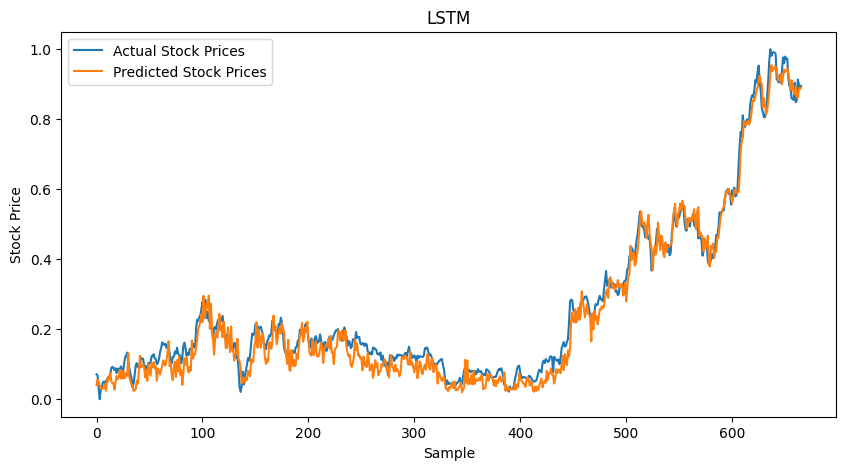

In [ ]:
# Plot the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test.numpy(), label='Actual Stock Prices')
plt.plot(predictions, label='Predicted Stock Prices')
plt.xlabel('Sample')
plt.ylabel('Stock Price')
plt.title('LSTM')
plt.legend()
plt.show()

## hyper-parameter optim

In [ ]:
def objective(trial):
    # Suggest hyperparameters to tune
    hidden_dim = trial.suggest_int('hidden_dim', 32, 256, step=32)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)

    # Data dimensions (input_dim, output_dim, seq_dim)
    input_dim = len(X)
    output_dim = predict_forward
    seq_dim = window_size

    # Initialize the LSTM model with the suggested hyperparameters
    model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

    # Define the MSE loss function and the optimizer
    criterion_mse = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    model.train()
    num_epochs = 100
    for epoch in range(num_epochs):
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)  # Permute to shape (batch_size, num_features, sequence_length)
            loss_mse = criterion_mse(outputs.squeeze(), targets)
            loss_mse.backward()
            optimizer.step()

        # Report validation loss at each epoch
        val_loss = validate(model, X_test, y_test)
        trial.report(val_loss, epoch)

        # Prune the trial if it's not promising
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return val_loss

# Validation function to evaluate the model on the validation set
def validate(model, X_test, y_test):
    model.eval()  # Set the model to evaluation mode
    criterion_mse = nn.MSELoss()
    criterion_mae = nn.L1Loss()
    with torch.no_grad():
        test_outputs = model(X_test)
        lstm_mse = criterion_mse(test_outputs.squeeze(), y_test)
        lstm_mae = criterion_mae(test_outputs.squeeze(), y_test)
        predictions = test_outputs.squeeze().numpy()

    return lstm_mse  # Return MSE loss for optimization

# Optuna study definition
study = optuna.create_study(direction='minimize')  # Minimize validation MSE loss
study.optimize(objective, n_trials=50)  # Number of trials to run

# Display the best trial hyperparameters and value
best_trial = study.best_trial

print(f'Best trial hyperparameters: {best_trial.params}')
print(f'Best trial MSE loss: {best_trial.value:.4f}')

[I 2024-11-01 09:10:43,065] A new study created in memory with name: no-name-feec3b64-080c-4f58-a27d-5cfc61347d17
[I 2024-11-01 09:14:03,871] Trial 0 finished with value: 0.11426690220832825 and parameters: {'hidden_dim': 160, 'num_layers': 4, 'lr': 0.00044987337902194024}. Best is trial 0 with value: 0.11426690220832825.
[I 2024-11-01 09:14:23,368] Trial 1 finished with value: 0.116141177713871 and parameters: {'hidden_dim': 32, 'num_layers': 1, 'lr': 0.007047917870059111}. Best is trial 0 with value: 0.11426690220832825.
[I 2024-11-01 09:17:02,000] Trial 2 finished with value: 0.11375196278095245 and parameters: {'hidden_dim': 160, 'num_layers': 3, 'lr': 0.007605045941742589}. Best is trial 2 with value: 0.11375196278095245.
[I 2024-11-01 09:17:26,526] Trial 3 finished with value: 0.11318786442279816 and parameters: {'hidden_dim': 64, 'num_layers': 1, 'lr': 0.00021251145250317357}. Best is trial 3 with value: 0.11318786442279816.
[I 2024-11-01 09:19:17,980] Trial 4 finished with valu

Best trial hyperparameters: {'hidden_dim': 32, 'num_layers': 4, 'lr': 0.0004953938019246505}
Best trial MSE loss: 0.1111


## TCN

In [ ]:
class CausalConv1d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, dilation=1):
        super(CausalConv1d, self).__init__()
        self.padding = (kernel_size - 1) * dilation
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, padding=self.padding, dilation=dilation)

    def forward(self, x):
        out = self.conv(x)
        return out[:, :, :-self.padding]

class TemporalBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, dilation, dropout):
        super(TemporalBlock, self).__init__()
        self.conv1 = CausalConv1d(in_channels, out_channels, kernel_size, dilation=dilation)
        self.conv2 = CausalConv1d(out_channels, out_channels, kernel_size, dilation=dilation)
        # Apply weight_norm to the Conv1d layers within CausalConv1d
        weight_norm(self.conv1.conv)
        weight_norm(self.conv2.conv)
        self.downsample = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else None
        if self.downsample is not None:
            self.downsample = weight_norm(self.downsample)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = self.relu(self.conv1(x))
        out = self.dropout(out)
        out = self.relu(self.conv2(out))
        out = self.dropout(out)

        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)

class TemporalConvNet(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size, dropout=dropout)]
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class TCN(nn.Module):
    def __init__(self, num_inputs, num_channels, num_classes, kernel_size=2, dropout=0.2):
        super(TCN, self).__init__()
        self.tcn = TemporalConvNet(num_inputs, num_channels, kernel_size, dropout)
        self.linear = nn.Linear(num_channels[-1], num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        y1 = self.tcn(x)
        o = self.linear(y1[:, :, -1])
        o = self.sigmoid(o)

        return o

In [ ]:
# Parameters
output_size = 1  # Predicting a single value
num_channels = [128]  # Number of channels in each TemporalBlock
kernel_size = 2
dropout = 0.1
num_epochs = 150

In [ ]:
input_size = X_train.shape[2]  # Number of input features

# Create model
model = TCN(input_size, num_channels, output_size, kernel_size, dropout)
criterion_mse = nn.MSELoss()
criterion_mae = nn.L1Loss()
optimizer = optim.Adam(model.parameters())

# Training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in dataloader:

        outputs = model(inputs.permute(0, 2, 1))  # Permute to shape (batch_size, num_features, sequence_length)
        loss_mse = criterion_mse(outputs.squeeze(), targets)
        loss_mae = criterion_mae(outputs.squeeze(), targets)
        loss_mse.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 10 == 0 and epoch !=0:
      print(f'Epoch {epoch+1}/{num_epochs}, MSE Loss: {loss_mse:.4f}, MAE Loss: {loss_mae:.4f}')

Epoch 11/150, MSE Loss: 0.0003, MAE Loss: 0.0137
Epoch 21/150, MSE Loss: 0.0007, MAE Loss: 0.0211
Epoch 31/150, MSE Loss: 0.0009, MAE Loss: 0.0215
Epoch 41/150, MSE Loss: 0.0003, MAE Loss: 0.0141
Epoch 51/150, MSE Loss: 0.0005, MAE Loss: 0.0182
Epoch 61/150, MSE Loss: 0.0007, MAE Loss: 0.0171
Epoch 71/150, MSE Loss: 0.0003, MAE Loss: 0.0101
Epoch 81/150, MSE Loss: 0.0001, MAE Loss: 0.0095
Epoch 91/150, MSE Loss: 0.0003, MAE Loss: 0.0131
Epoch 101/150, MSE Loss: 0.0002, MAE Loss: 0.0101
Epoch 111/150, MSE Loss: 0.0004, MAE Loss: 0.0141
Epoch 121/150, MSE Loss: 0.0001, MAE Loss: 0.0091
Epoch 131/150, MSE Loss: 0.0001, MAE Loss: 0.0079
Epoch 141/150, MSE Loss: 0.0002, MAE Loss: 0.0105


In [ ]:
model.eval()

with torch.no_grad():
    test_outputs = model(X_test.permute(0, 2, 1))
    tcn_mse = criterion_mse(test_outputs.squeeze(), y_test.reshape(-1,))
    tcn_mae = criterion_mae(test_outputs.squeeze(), y_test.reshape(-1,))
    predictions = test_outputs.squeeze().numpy()

print(f'Test MSE Loss: {tcn_mse:.6f}, Test MAE Loss: {tcn_mae:.6f}')

Test MSE Loss: 0.001562, Test MAE Loss: 0.031852


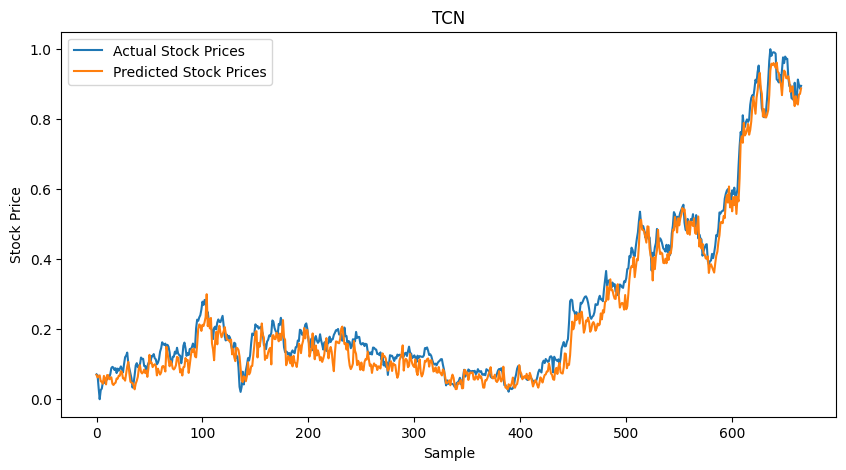

In [ ]:
# Plot the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test.numpy(), label='Actual Stock Prices')
plt.plot(predictions, label='Predicted Stock Prices')
plt.xlabel('Sample')
plt.ylabel('Stock Price')
plt.title('TCN')
plt.legend()
plt.show()

# hyperparameter optim

In [ ]:
# Define objective function for Optuna
def objective(trial):
    # Suggest hyperparameters for tuning
    num_channels = trial.suggest_categorical('num_channels', [[32], [64], [128], [64, 64], [128, 128]])  # Different possible architectures
    kernel_size = trial.suggest_int('kernel_size', 2, 5)
    dropout = trial.suggest_float('dropout', 0.05, 0.5)
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)

    # Data dimensions (input_size, output_size) are placeholders
    input_size = len(X)
    output_size = predict_forward

    # Initialize the TCN model with the suggested hyperparameters
    model = TCN(input_size, num_channels, output_size, kernel_size, dropout)

    # Define loss functions and optimizer
    criterion_mse = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    model.train()
    num_epochs = 50
    for epoch in range(num_epochs):
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            # Permuting the input to (batch_size, num_features, sequence_length) for the TCN
            outputs = model(inputs.permute(0, 2, 1))
            loss_mse = criterion_mse(outputs.squeeze(), targets)
            loss_mse.backward()
            optimizer.step()

        # Report validation loss at each epoch
        val_loss = validate(model, X_test, y_test)  # Assuming a validation function exists
        trial.report(val_loss, epoch)

        # Prune the trial if it's not promising
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return val_loss

# Validation function to evaluate the model on the validation set
def validate(model, X_test, y_test):
    model.eval()
    criterion_mse = nn.MSELoss()
    criterion_mae = nn.L1Loss()
    with torch.no_grad():
        test_outputs = model(X_test.permute(0, 2, 1))
        tcn_mse = criterion_mse(test_outputs.squeeze(), y_test)
        tcn_mae = criterion_mae(test_outputs.squeeze(), y_test)
        predictions = test_outputs.squeeze().numpy()
    return tcn_mse

# Optuna study definition
study = optuna.create_study(direction='minimize')  # Minimize the validation MSE loss
study.optimize(objective, n_trials=50)  # Number of trials

# Display the best hyperparameters found
best_trial = study.best_trial
print(f'Best trial: {best_trial.params}')

[I 2024-11-01 09:36:53,795] A new study created in memory with name: no-name-87871b32-37f5-4c5c-b021-5c48983efa16
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [32] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [64] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [128] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a cat

Best trial: {'num_channels': [64], 'kernel_size': 2, 'dropout': 0.38905731249284736, 'lr': 5.8952802833642117e-05}


## SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
svr = SVR(kernel='linear', C=10)
svr.fit(X_train.reshape(X_train.shape[0], -1), y_train)
pred_svr = svr.predict(X_test.reshape(X_test.shape[0], -1))
mse_svr = mean_squared_error(y_test, pred_svr)
mae_svr = mean_absolute_error(y_test, pred_svr)
mse_svr, mae_svr

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.0016873699702823872, 0.035502247514850385)

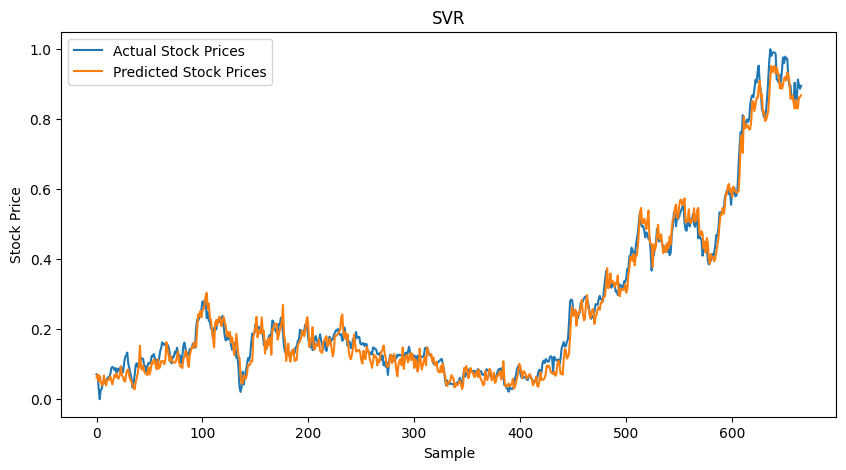

In [ ]:
# Plot the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test.numpy(), label='Actual Stock Prices')
plt.plot(predictions, label='Predicted Stock Prices')
plt.xlabel('Sample')
plt.ylabel('Stock Price')
plt.title('SVR')
plt.legend()
plt.show()

## RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF = RandomForestRegressor(max_depth=30, min_samples_leaf= 2, min_samples_split=10, n_estimators=300)
RF.fit(X_train.reshape(X_train.shape[0], -1), y_train)
pred_RF = RF.predict(X_test.reshape(X_test.shape[0], -1))
mse_RF = mean_squared_error(y_test, pred_RF)
mae_RF = mean_absolute_error(y_test, pred_RF)
mse_RF, mae_RF

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(0.0004919433041824439, 0.01649171710849838)

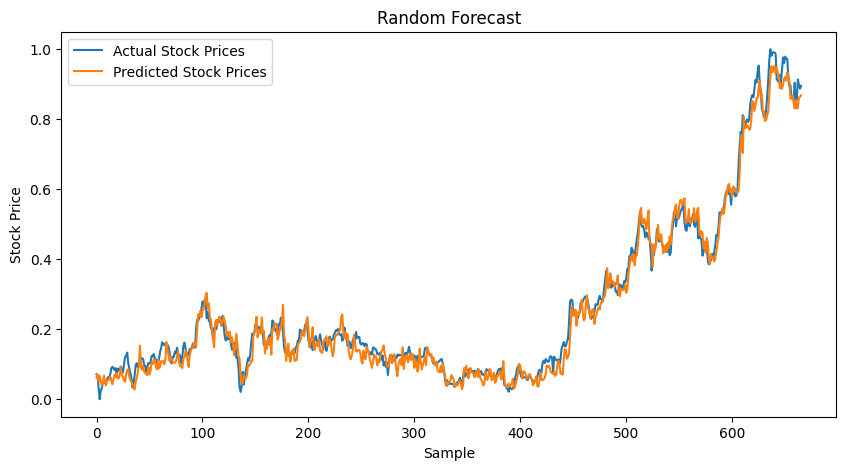

In [ ]:
# Plot the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test.numpy(), label='Actual Stock Prices')
plt.plot(predictions, label='Predicted Stock Prices')
plt.xlabel('Sample')
plt.ylabel('Stock Price')
plt.title('Random Forecast')
plt.legend()
plt.show()